# Tarea
## Modelación Supervisada
Esta tarea consiste de dos partes. La primera consiste en la primera mitad del curso, y la segunda en la otra.
Esta tarea vale 100 puntos y contiene varias secciones donde podrás ganar puntos extras. Justifica tus respuestas y respeta el deadline. Sigue las instrucciones en los comentarios como guía.

**Deadline: 20 marzo 23:59 PM**

# Parte 1 - Exploración de datos y tus primeros modelos supervisados. [30 puntos]
Esta parte de la tarea consiste en refinar tus skills de Data Exploration y Pre-processing. También podrás entrenar tus primeros modelos supervisados. 

In [1]:
## Importa librerías útiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import itertools
import random


# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, roc_curve, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

In [2]:
# Funciones útiles
def grafica_matriz_confusion(cm, classes=[0,1], normalize=False, title='Matriz de confusión\n', cmap=plt.cm.Reds):
    """ 
    Función para mostrar la matriz de confusión de un problema de clasificación binario. 
    El parámetro cm puede ser el objeto resultante de ejecutar la función confusion_matrix() de la librería sklearn.
    
    Args:
        cm         matriz de confusión de sklearn
        classes    categorías de la variable target
        normalize  normaliza asignando el parámetro True
        title      string para definir el título para la gráfica
        cmap       mapa de colores
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max()
    text = [["VN =", "FN ="], ["FP =", "VP ="]]
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "     {}".format(round (cm[i, j],2)), horizontalalignment="left",
                 color="white" if cm[i, j] > thresh else "black")
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, text[j][i] , horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Valor real')
    plt.xlabel('Predicción')
    
def grafica_curva_roc(fpr, tpr, title='Curva ROC', note=''):
    """
    Función para graficar la curva ROC
    Los parámetros fpr y tpr son el output de ejecutar la función roc_curve de sklearn
    
    Args:
        fpr        Tasa de falsos positivos 
        tpr        Tasa de verdaderos positivos
        title      sting para definir el título de la gráfica
        note       Nota para mostrar en la gráfica
    """
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('Tasa de falsos positivos ')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title(title)
    if note: plt.text(0.6, 0.2, note)
    plt.show()

## 1) Exploración y Limpieza de datos [10 puntos]
Tu tarea aquí es explorar los data sets **happiness2020.csv** y **countries_info.csv** y responder algunas preguntas.

El layout de **happiness2020.csv** es:

* country: Nombre del país
* happiness_score: Score de felicidad
* social_support: Ayuda social
* healthy_life_expectancy: Expectativa de vida
* freedom_of_choices: Libertar de tomar decisiones de vida
* generosity: Generosidad
* perception_of_corruption: Percepción de la corrupción
* world_region: Región en donde se encuentra el país en cuestión


El layout de **countries_info.csv**

* country_name: Nombre del país
* area: Área en metros cuadrados
* population: Número de personas
* literacy: Porcentaje de alfabetismo


In [3]:
# Carga el data set happiness2020.csv
happiness = pd.read_csv("happiness2020.csv")


In [4]:
# Explora el set de datos (número de variables, observaciones, checa 5 registros y más!)
print("Numero de variables:",happiness.shape[1])
print("Numero de observaciones:",happiness.shape[0])
print("Primeros 5 registros: \n",happiness.head(5))
print("Numero de valores perdidos por cada columna:\n",happiness.isna().sum())
print("Estadísticos descriptivos de los datos:\n",happiness.describe())

Numero de variables: 8
Numero de observaciones: 135
Primeros 5 registros: 
        country  happiness_score  social_support  healthy_life_expectancy  \
0  Afghanistan           2.5669        0.470367                52.590000   
1      Albania           4.8827        0.671070                68.708138   
2      Algeria           5.0051        0.803385                65.905174   
3    Argentina           5.9747        0.900568                68.803802   
4      Armenia           4.6768        0.757479                66.750656   

   freedom_of_choices  generosity  perception_of_corruption  \
0            0.396573   -0.096429                  0.933687   
1            0.781994   -0.042309                  0.896304   
2            0.466611   -0.121105                  0.735485   
3            0.831132   -0.194914                  0.842010   
4            0.712018   -0.138780                  0.773545   

                         world_region  
0                          South Asia  
1       

In [5]:
# Carga el data set countries_info.csv
# La variable literacy contiene números con formato europeo. Hint: busca en la documentación de pandas como importar estos datos para ser interpretados como números
countries = pd.read_csv("countries_info.csv",decimal=",")

In [6]:
# Explora el set de datos (número de variables, observaciones, checa 5 registros y más!)
print("Numero de variables:",countries.shape[1])
print("Numero de observaciones:",countries.shape[0])
print("Primeros 5 registros: \n",countries.head(5))
print("Numero de valores perdidos por cada columna:\n",countries.isna().sum())
print("Estadísticos descriptivos de los datos:\n",countries.describe())

Numero de variables: 4
Numero de observaciones: 135
Primeros 5 registros: 
   country_name     area  population  literacy
0  afghanistan   647500    31056997      36.0
1      albania    28748     3581655      86.5
2      algeria  2381740    32930091      70.0
3    argentina  2766890    39921833      97.1
4      armenia    29800     2976372      98.6
Numero de valores perdidos por cada columna:
 country_name    0
area            0
population      0
literacy        2
dtype: int64
Estadísticos descriptivos de los datos:
                area    population    literacy
count  1.350000e+02  1.350000e+02  133.000000
mean   9.007829e+05  4.552204e+07   81.851128
std    2.244994e+06  1.505270e+08   20.514483
min    3.160000e+02  2.993880e+05   17.600000
25%    6.540500e+04  4.636146e+06   70.000000
50%    2.375000e+05  1.023546e+07   90.900000
75%    7.000570e+05  2.967980e+07   98.400000
max    1.707520e+07  1.313974e+09  100.000000


In [7]:
# Une los datos utilizando la función merge de pandas
# Ojo: ¿Cuál es la llave de cruce en cada set de datos? ¿Ves algo que pueda afectar a la hora de cruzar los datos con esta llave? 
# Explica por que y toma la decisión correcta para transformar una de las variables de cruce

# Repuesta: 
# Algunos nombres de países difieren en que en un dataset empiezan con mayusculas y en otro con minusculas.
# Al realizar el cruce usando como llave el nombre del pais, esta diferencia entre mayusculas y minusculas provoca que no hagan match a pesar de ser el mismo país.
# Una forma de lidiar con este problema es pasar los datos a mayusculas y realizar el cruce.
happiness["country"]      = happiness["country"].apply(lambda x: x.upper())
countries["country_name"] = countries["country_name"].apply(lambda x: x.upper()) 

datos = pd.merge(happiness,countries, how='outer', left_on='country', right_on='country_name', indicator = True) #Realizar el cruce
datos.drop(columns=["_merge","country_name"],inplace=True)
datos.head(2)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,AFGHANISTAN,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0
1,ALBANIA,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5


In [8]:
# Explora el set de datos que contiene los dos sets anteriores (número de variables, observaciones, checa 5 registros y más!)
print("Numero de variables:",datos.shape[1])
print("Numero de observaciones:",datos.shape[0])
print("Primeros 5 registros: \n",datos.head(5))
print("Numero de valores perdidos por cada columna:\n",datos.isna().sum())
print("Estadísticos descriptivos de los datos:\n",datos.describe())

Numero de variables: 11
Numero de observaciones: 135
Primeros 5 registros: 
        country  happiness_score  social_support  healthy_life_expectancy  \
0  AFGHANISTAN           2.5669        0.470367                52.590000   
1      ALBANIA           4.8827        0.671070                68.708138   
2      ALGERIA           5.0051        0.803385                65.905174   
3    ARGENTINA           5.9747        0.900568                68.803802   
4      ARMENIA           4.6768        0.757479                66.750656   

   freedom_of_choices  generosity  perception_of_corruption  \
0            0.396573   -0.096429                  0.933687   
1            0.781994   -0.042309                  0.896304   
2            0.466611   -0.121105                  0.735485   
3            0.831132   -0.194914                  0.842010   
4            0.712018   -0.138780                  0.773545   

                         world_region     area  population  literacy  
0               

In [9]:
# Determina el top 10 de países más felices
print(datos.sort_values(by="happiness_score",ascending=False).head(10)[["country","happiness_score"]])

         country  happiness_score
38       FINLAND           7.8087
31       DENMARK           7.6456
115  SWITZERLAND           7.5599
50       ICELAND           7.5045
92        NORWAY           7.4880
87   NETHERLANDS           7.4489
114       SWEDEN           7.3535
88   NEW ZEALAND           7.2996
6        AUSTRIA           7.2942
72    LUXEMBOURG           7.2375


In [10]:
# Determina el top 10 de regiones con países más felices (¿Cómo puedes medir la felicidad por región?)

# Respuesta:
# Tomare como medida de felicidad por region el promedio de score de felicidad de los paises que pertenecen a la región
datos.groupby("world_region")["happiness_score"].agg(np.mean)

world_region
Central and Eastern Europe            5.891393
Commonwealth of Independent States    5.358342
East Asia                             5.483633
Latin America and Caribbean           5.971280
Middle East and North Africa          5.269306
North America and ANZ                 7.173525
South Asia                            4.355083
Southeast Asia                        5.517788
Sub-Saharan Africa                    4.393856
Western Europe                        6.967405
Name: happiness_score, dtype: float64

In [11]:
# ¿Cuáles son las regiones con países más felices? Muestra el nombre y el score de felicidad

# Respuesta:
# Mostraré el top 3
print(pd.DataFrame(datos.sort_values(by="happiness_score",ascending=False)["world_region"].unique()[0:3],columns=["Top 3"]))

                          Top 3
0                Western Europe
1         North America and ANZ
2  Middle East and North Africa


In [12]:
# ¿Cuál es el top 10 de países con mayor porcentaje de alfabetismo?

# Respuesta:
# Dado que se tienen valores NA en la columna alfabetismo (literacy), procederé a imputar los datos usando la media de alfabetismo de la región
datos['literacy'] = datos.groupby(['world_region'], sort=False)['literacy'].apply(lambda x: x.fillna(x.mean()))
datos.sort_values(by="literacy",ascending=False).head(10)["country"]

38           FINLAND
5          AUSTRALIA
72        LUXEMBOURG
92            NORWAY
31           DENMARK
30    CZECH REPUBLIC
50           ICELAND
66            LATVIA
36           ESTONIA
98            POLAND
Name: country, dtype: object

In [13]:
# ¿Cuáles son las regiones del mundo que tienen los países con mayor tasa de alfabetismo?

# Respuesta:
# Mostraré el top 3
print(pd.DataFrame(datos.sort_values(by="literacy",ascending=False)["world_region"].unique()[0:3],columns=["Top 3"]))

                        Top 3
0              Western Europe
1       North America and ANZ
2  Central and Eastern Europe


In [14]:
# Muestra los países de la región con mayor porcentaje de alfabetismo

print(datos[datos["world_region"]=="Western Europe"][["country","world_region"]])

            country    world_region
6           AUSTRIA  Western Europe
11          BELGIUM  Western Europe
29           CYPRUS  Western Europe
31          DENMARK  Western Europe
38          FINLAND  Western Europe
39           FRANCE  Western Europe
42          GERMANY  Western Europe
44           GREECE  Western Europe
50          ICELAND  Western Europe
55          IRELAND  Western Europe
57            ITALY  Western Europe
72       LUXEMBOURG  Western Europe
78            MALTA  Western Europe
87      NETHERLANDS  Western Europe
92           NORWAY  Western Europe
99         PORTUGAL  Western Europe
111           SPAIN  Western Europe
114          SWEDEN  Western Europe
115     SWITZERLAND  Western Europe
126  UNITED KINGDOM  Western Europe


In [15]:
# ¿Cuál es el top 10 de países de países con menor porcentaje de alfabetismo?

datos.sort_values(by="literacy",ascending=True).head(10)["country"]

90            NIGER
17     BURKINA FASO
106    SIERRA LEONE
46           GUINEA
0       AFGHANISTAN
104         SENEGAL
54             IRAQ
12            BENIN
79       MAURITANIA
37         ETHIOPIA
Name: country, dtype: object

In [16]:
# ¿Cuáles son las regiones del mundo que tienen los países con menor tasa de alfabetismo?

# Respuesta:
# Mostraré el top 3
print(pd.DataFrame(datos.sort_values(by="literacy",ascending=True)["world_region"].unique()[0:3],columns=["Top 3"]))

                          Top 3
0            Sub-Saharan Africa
1                    South Asia
2  Middle East and North Africa


In [17]:
# Muestra los países de la región con menor porcentaje de alfabetismo
print(datos[datos["world_region"]=="Sub-Saharan Africa"][["country","world_region"]])

          country        world_region
12          BENIN  Sub-Saharan Africa
14       BOTSWANA  Sub-Saharan Africa
17   BURKINA FASO  Sub-Saharan Africa
18        BURUNDI  Sub-Saharan Africa
20       CAMEROON  Sub-Saharan Africa
22           CHAD  Sub-Saharan Africa
26        COMOROS  Sub-Saharan Africa
37       ETHIOPIA  Sub-Saharan Africa
40          GABON  Sub-Saharan Africa
43          GHANA  Sub-Saharan Africa
46         GUINEA  Sub-Saharan Africa
62          KENYA  Sub-Saharan Africa
68        LESOTHO  Sub-Saharan Africa
69        LIBERIA  Sub-Saharan Africa
74     MADAGASCAR  Sub-Saharan Africa
75         MALAWI  Sub-Saharan Africa
77           MALI  Sub-Saharan Africa
79     MAURITANIA  Sub-Saharan Africa
80      MAURITIUS  Sub-Saharan Africa
85     MOZAMBIQUE  Sub-Saharan Africa
90          NIGER  Sub-Saharan Africa
91        NIGERIA  Sub-Saharan Africa
102        RWANDA  Sub-Saharan Africa
104       SENEGAL  Sub-Saharan Africa
106  SIERRA LEONE  Sub-Saharan Africa
110  SOUTH A

In [18]:
# Determina el top 10 de países con mayor cantidad de personas

datos.sort_values(by="population",ascending=False).head(10)["country"]

24             CHINA
51             INDIA
127    UNITED STATES
52         INDONESIA
15            BRAZIL
93          PAKISTAN
9         BANGLADESH
101           RUSSIA
91           NIGERIA
59             JAPAN
Name: country, dtype: object

In [19]:
# ¿Cuáles son las regiones más pobladas del mundo?

# Respuesta:
# Mostraré el top 3
print(pd.DataFrame(datos.sort_values(by="population",ascending=False)["world_region"].unique()[0:3],columns=["Top 3"])) 

                   Top 3
0              East Asia
1             South Asia
2  North America and ANZ


In [20]:
# ¿Cuáles son los países en las regiones menos pobladas del mundo?
print(datos[datos["world_region"]=="East Asia"][["country","world_region"]]) 

     country world_region
24     CHINA    East Asia
59     JAPAN    East Asia
83  MONGOLIA    East Asia


In [21]:
# ¿Cuál es el score de felicidad de los tres países más poblados del mundo?

print(datos.sort_values(by="population",ascending=False).head(3)[["country","happiness_score"]]) 

           country  happiness_score
24           CHINA           5.1239
51           INDIA           3.5733
127  UNITED STATES           6.9396


In [22]:
# ¿Cuál es el score de felicidad de los tres países menos poblados del mundo?
print(datos.sort_values(by="population",ascending=True).head(3)[["country","happiness_score"]]) 

       country  happiness_score
50     ICELAND           7.5045
78       MALTA           6.7728
72  LUXEMBOURG           7.2375


       happiness_score    literacy    population
count       135.000000  135.000000  1.350000e+02
mean          5.525062   82.086667  4.552204e+07
std           1.123414   20.451886  1.505270e+08
min           2.566900   17.600000  2.993880e+05
25%           4.749000   70.200000  4.636146e+06
50%           5.541500   90.900000  1.023546e+07
75%           6.292700   98.200000  2.967980e+07
max           7.808700  100.000000  1.313974e+09 



Text(0.5, 1.0, 'population')

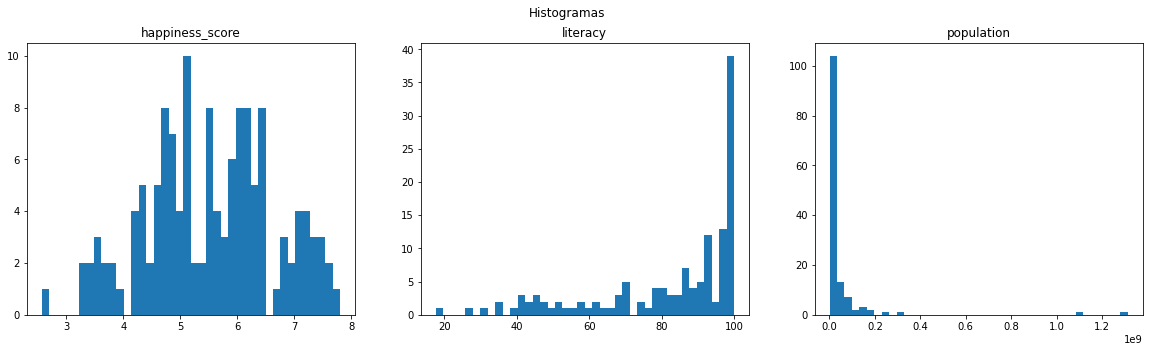

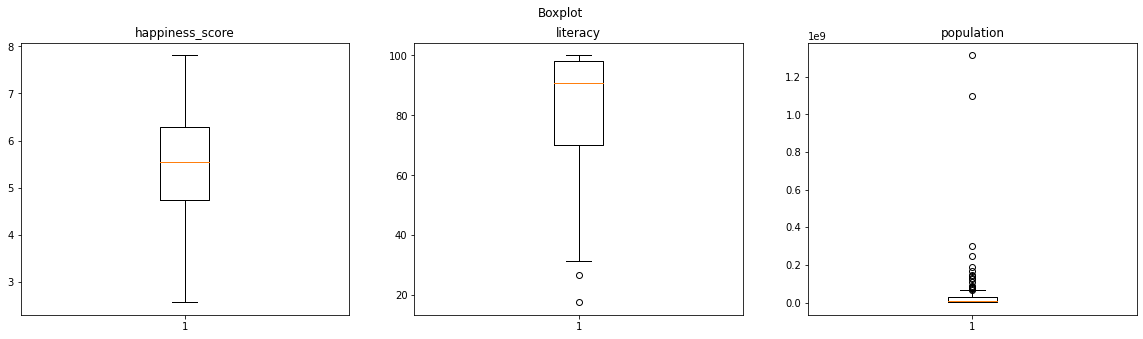

In [23]:
# Gráfica y explora las variables happiness_score, literacy y population
# Hint: Utiliza los métodos vistos en clase para variables númericas 

# Primero veamos las estadísticas principales de estas variables
print(datos[["happiness_score","literacy","population"]].describe(),"\n")

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Histogramas')
ax1.hist(datos["happiness_score"],bins=40)
ax2.hist(datos["literacy"],bins=40)
ax3.hist(datos["population"],bins=40)
ax1.set_title("happiness_score")
ax2.set_title("literacy")
ax3.set_title("population")

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Boxplot')
ax1.boxplot(datos["happiness_score"])
ax2.boxplot(datos["literacy"])
ax3.boxplot(datos["population"])
ax1.set_title("happiness_score")
ax2.set_title("literacy")
ax3.set_title("population")

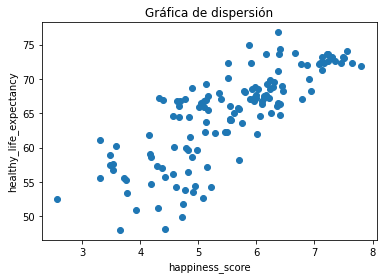

Correlacion de Pearson: 0.788


In [24]:
# ¿Existe una relación (¿de qué tipo?) entre la variable happiness_score y healthy_life_expectancy?
# Hint: Gráfica la relación que existe entre las variables

fig, ax = plt.subplots()
ax.scatter(datos["happiness_score"],datos["healthy_life_expectancy"])
ax.set_title("Gráfica de dispersión")
ax.set_xlabel("happiness_score")
ax.set_ylabel("healthy_life_expectancy")
plt.show()

# Podemos visualizar que existe una correlación lineal positiva entre la puntuación de felicidad y la esperanza de vida
# Calculando el coeficiente de correlación de pearson tenemos:
from scipy.stats import pearsonr
corr, _ = pearsonr(datos["happiness_score"],datos["healthy_life_expectancy"])
print('Correlacion de Pearson: %.3f' % corr)

¿Podrías entrenar un modelo de regresión lineal para predecir la variable healthy_life_expectancy con base en la variable independiente happiness_score? ¿Sería un buen modelo para predecir la expectativa de vida? Elabora tu respuesta


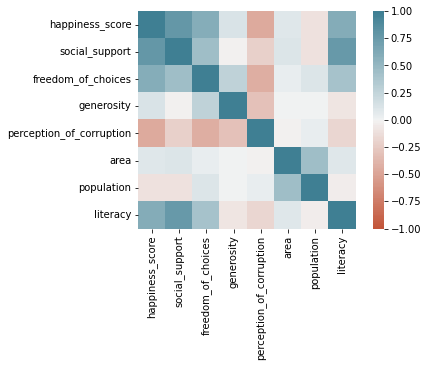

In [25]:
# Respuesta:
# Sí, podríamos realizar una regresión lineal con happiness_score como variable independiente, ya que como vimos en el gráfico de dispersión, parece
# haber una correlación lineal entre ambas variables.
# Considero que sería un buen modelo, ya que un modelo de regresión lineal es útil cuando existe correlación lineal entre la variable target y la variable independiente.
# Habría que obtener los parámetros del modelo de regresión y posteriormente calcular el estadístico R cuadrado. De igual manera, si queremos predecir valores es
# altamente recomendable validar los supuestos de los modelos de regresión, tales como la normalidad de los residuales.

# Define la variable target (healthy_life_expectancy)
y = np.array(datos["healthy_life_expectancy"])

# Define el conjunto de variables independientes
# Respuesta: Visualizando la matriz de correlación entre las variables numericas independientes podemos observar que happiness_score y social_support están altamente correlacionadas.
# De igual manera perception_of_corruption tiene una fuerte correlación con happiness_score, social_support, freedom_of_choices y generosity.
# Por lo cual decidí omitir las variables social_support y perception_of_corruption para ajustar el modelo de regresión lineal.
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(
  datos.drop(columns=["country","world_region","healthy_life_expectancy"]).corr(), 
  vmin=-1, vmax=1, center=0,
  cmap=sns.diverging_palette(20, 220, n=200),
  square=True)

X = datos.drop(columns=["country","world_region","healthy_life_expectancy","social_support","perception_of_corruption"])


# Utiliza la función de sklearn para partir los datos en set de entrenamiento y validación
# 70% train, 30% test, utiliza una semilla para poder replicar resultados (busca en la documentación de sklearn como hacer esto)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [26]:
# Entrena un modelo de regresión lineal y determina el score R² y el score de error (MSE)
modelo_regresion_lineal = LinearRegression()
modelo_regresion_lineal.fit(X_train,y_train)

print("R^2:",modelo_regresion_lineal.score(X_test,y_test))
print("MSE:",mean_squared_error(y_test,modelo_regresion_lineal.predict(X_test)))


R^2: 0.7938344695068895
MSE: 8.318597037674191


## 2) Regresión logísitica utilizando el método de gradiente descendente aplicado a una función de costo de error cuadrático medio [20 puntos]
En esta parte se requiere llevar a cabo una tarea de clasificación. Para ello vamos a utilizar una regresión logística. Primero que nada expliquemos el modelo anterior.

**Regresión logística**
Es un modelo que sirve para clasificar observaciones. En pocas palabras (y para esta tarea) la regresión logística es una transformación del modelo de regresión lineal sin término regularizador. Es decir, una regresión logística transforma las predicciones de una regresión lineal a un valor de probabilidad. 

$y = \textbf{X}^T\textbf{W}$

$y\_pred = \sigma(y)$

En esta parte de la tarea deberás utilizar el método de gradiente descendente para estimar los parámetros de una regresión lineal y después transformar las predicciones en probabilidades utilizando la función sigmoide. 

Vamos a utilizar un data set con información de los pasajeros del barco Titanic (**titanic.xls**). A continuación puedes ver el layout:

* name: Nombre del pasajero
* sex: Sexo del pasajero
* age: edad en años
* sibsp: # hijos / esposos abordo del Titanic
* parch: # padres / niños abordo del Titanic
* ticket: número de ticket de pasajero
* fare: precio del ticket
* cabin: Número de cabina en el barco
* embarked: Puerto de embarcación


In [27]:
import xlrd                                                                     #Lectura de los datos
workbook = xlrd.open_workbook('titanic.xls', encoding_override='cp1252') 
sheet = workbook.sheet_by_name("titanic3")
titanic = {'survived':sheet.col_values(0, start_rowx=1, end_rowx=None),
  'name':sheet.col_values(1, start_rowx=1, end_rowx=None),
  'sex':sheet.col_values(2, start_rowx=1, end_rowx=None),
  'age':sheet.col_values(3, start_rowx=1, end_rowx=None),
  'sibsp':sheet.col_values(4, start_rowx=1, end_rowx=None),
  'parch':sheet.col_values(5, start_rowx=1, end_rowx=None),
  'ticket':sheet.col_values(6, start_rowx=1, end_rowx=None),
  'fare':sheet.col_values(7, start_rowx=1, end_rowx=None),
  'cabin':sheet.col_values(8, start_rowx=1, end_rowx=None),
  'embarked':sheet.col_values(9, start_rowx=1, end_rowx=None)}
titanic = pd.DataFrame(titanic)
titanic = titanic.replace("", np.nan, regex=True)                               #Considerar los espacios en blanco como np.nan
titanic.head(5)

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160.0,211.3375,B5,S
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.5500,C22 C26,S
2,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781.0,151.5500,C22 C26,S
3,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781.0,151.5500,C22 C26,S
4,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781.0,151.5500,C22 C26,S


Dimensión de los datos: (1309, 10)

Variables Categoricas
Variable: name Numero de valores únicos: 1307
Variable: sex Numero de valores únicos: 2
Variable: ticket Numero de valores únicos: 939
Variable: cabin Numero de valores únicos: 187
Variable: embarked Numero de valores únicos: 4

Variables Numericas
Variable: age Numero de valores únicos: 99
Variable: sibsp Numero de valores únicos: 7
Variable: parch Numero de valores únicos: 8
Variable: fare Numero de valores únicos: 282


Text(0.5, 1.0, 'embarked')

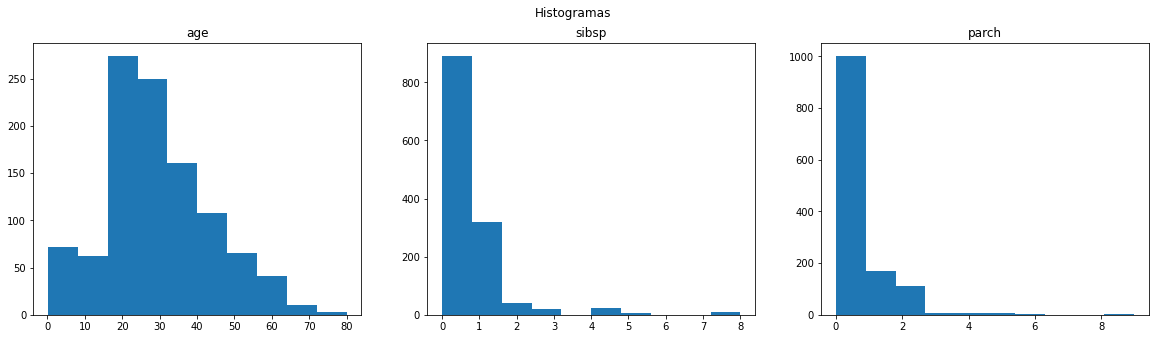

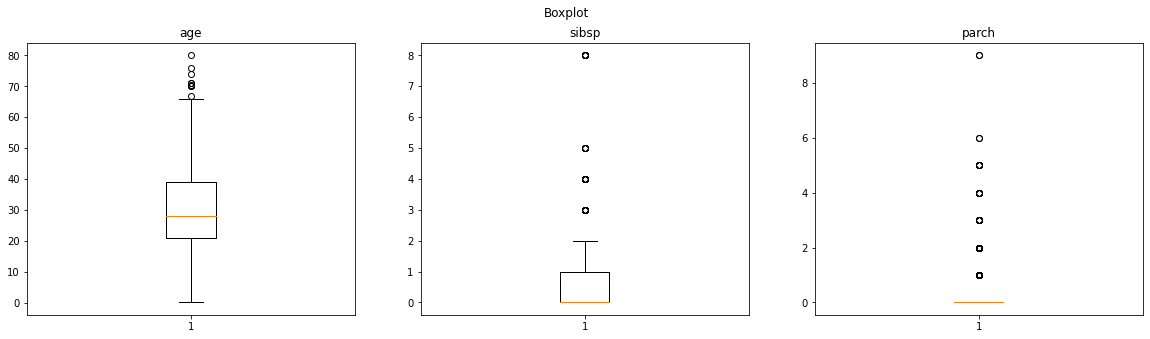

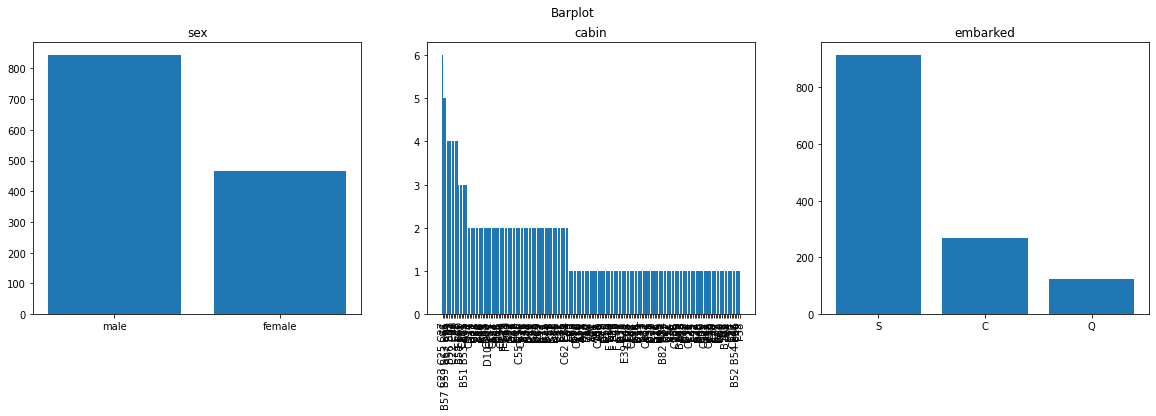

In [28]:
# Explora el data set
# Aquí ocupa todo lo que ya sabes para analizar un set de datos. Si el análisis que vas a realizar es muy bueno, podríamos considerar tener puntos extras

print("Dimensión de los datos:",titanic.shape)                                  #Conocer la dimensión del data set

numericas = ["age","sibsp","parch","fare"]                                      #Definimos cuales son las variables numéricas y cuales son categóricas
categoricas = ["name","sex","ticket","cabin","embarked"]

print("\nVariables Categoricas")                                                #Imprimir cuantos valores unicos tiene cada variable
for k in categoricas:
  print("Variable:",k, "Numero de valores únicos:" ,len(titanic[k].unique()))
print("\nVariables Numericas")
for k in numericas:
  print("Variable:",k, "Numero de valores únicos:" ,len(titanic[k].unique()))

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))                         #Histogramas para variables numéricas
fig.suptitle('Histogramas')
ax1.hist(titanic["age"],bins=10)
ax2.hist(titanic["sibsp"],bins=10)
ax3.hist(titanic["parch"],bins=10)
ax1.set_title("age")
ax2.set_title("sibsp")
ax3.set_title("parch")

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))                         #Graficos de caja para variables numericas
fig.suptitle('Boxplot')
ax1.boxplot(titanic["age"].dropna())  
ax2.boxplot(titanic["sibsp"])
ax3.boxplot(titanic["parch"])
ax1.set_title("age")
ax2.set_title("sibsp")
ax3.set_title("parch")

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))                         #Graficos de barras para variables categoricas
fig.suptitle('Barplot')
ax1.bar(titanic["sex"].value_counts().index,titanic["sex"].value_counts())  
ax2.bar(titanic["cabin"].value_counts().index,titanic["cabin"].value_counts()) 
ax3.bar(titanic["embarked"].value_counts().index,titanic["embarked"].value_counts()) 
ax1.set_title("sex")
ax2.set_title("cabin")
ax2.set_xticklabels(titanic["cabin"].value_counts().index,rotation=90)
ax3.set_title("embarked") 


#embarked tiene la cadena ""
#cabin    tiene la cadena ""
#fare     tiene la cadena ""
#ticket   demasiada variabilidad
#parch    OK
#sibsp    OK
#age      tiene la cadena ""
#sex      OK

In [29]:
# ¿Hace sentido utilizar todas las columnas para entrenar un modelo de clasificación? Elimina variables que podrían meter ruido y quedate solo con las que consideres cruciales

# Algunas variable son innecesarias y pueden afectar el desempeño de un modelo. Por ejemplo:
# Las variables "ticket","name" y "cabin" tiene demasiadas categorías y no resultan utiles ya que podrían introducir mucho ruido a un modelo de aprendizaje de maquina.
# Por lo cual procedere a eliminar dichas variables.
titanic.drop(columns=["ticket","name","cabin"],inplace=True)

In [30]:
# Preprocesa los datos
# Hint: crea variables dummies para la variable "sex"

# Respuesta: Antes de continuar procederé a convertir a cadena las variables categoricas y a numero las variables cuantitativas.

titanic["survived"] = titanic["survived"].apply(int).apply(str)
titanic["sex"] = titanic["sex"].apply(str)
titanic["sibsp"] = titanic["sibsp"].apply(int)
titanic["parch"] = titanic["parch"].apply(int)

#Posteriormente procederé a imputar los valores perdidos.
titanic["embarked"] = titanic["embarked"].fillna(titanic['embarked'].mode()[0])

# Posteriormente creare variables dummy para las variables categoricas "sex" y "embarked"
dummies_embarked = pd.get_dummies(titanic["embarked"],drop_first=True)
dummies_embarked.columns = "embarked_"+ dummies_embarked.columns
titanic = pd.merge(titanic,dummies_embarked,right_index=True,left_index=True,how="left")

dummies_sex = pd.get_dummies(titanic["sex"],drop_first=True)
dummies_sex.columns = "sex_"+ dummies_sex.columns
titanic = pd.merge(titanic,dummies_sex,right_index=True,left_index=True,how="left")

titanic

,survived,sex,age,sibsp,parch,fare,embarked,embarked_Q,embarked_S,sex_male
0,1,female,29.0000,0,0,211.3375,S,0,1,0
1,1,male,0.9167,1,2,151.5500,S,0,1,1
2,0,female,2.0000,1,2,151.5500,S,0,1,0
3,0,male,30.0000,1,2,151.5500,S,0,1,1
4,0,female,25.0000,1,2,151.5500,S,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1304,0,female,14.5000,1,0,14.4542,C,0,0,0
1305,0,female,NaN,1,0,14.4542,C,0,0,0
1306,0,male,26.5000,0,0,7.2250,C,0,0,1
1307,0,male,27.0000,0,0,7.2250,C,0,0,1


In [31]:
# Mostrar el nombre de las variables dummy creadas
print(dummies_embarked.columns.values)
print("\n")
print(dummies_sex.columns.values)

['embarked_Q' 'embarked_S']


['sex_male']


In [32]:
# Define la variable target (survived)
y = np.array(titanic["survived"])

# Define el conjunto de variables independientes
X = titanic[['age', 'sibsp', 'parch', 'fare', 'embarked_Q', 'embarked_S', 'sex_male']]

In [33]:
# Determina cuántas observaciones tienen un valor missing
X.isna().sum(axis=1).sum()

264

In [34]:
# Cuál o cuáles variables tienen valores missing
X.isna().sum()[X.isna().sum()>0]

age     263
fare      1
dtype: int64

               age         fare
count  1046.000000  1308.000000
mean     29.881135    33.295479
std      14.413500    51.758668
min       0.166700     0.000000
25%      21.000000     7.895800
50%      28.000000    14.454200
75%      39.000000    31.275000
max      80.000000   512.329200


Text(0.5, 1.0, 'fare')

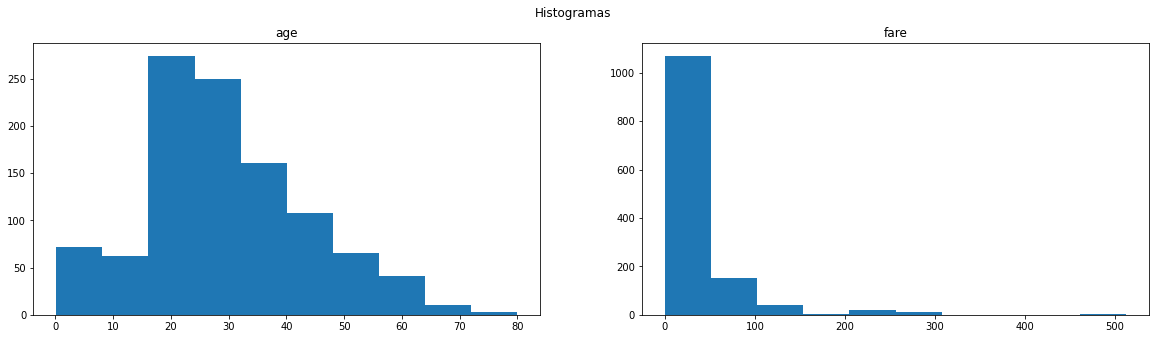

In [35]:
# Describe las variables para ver qué método podría servirnos para imputar valores nulos
print(X[["age","fare"]].describe())

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5))                         #Histogramas para variables numéricas
fig.suptitle('Histogramas')
ax1.hist(X["age"],bins=10)
ax2.hist(X["fare"],bins=10)
ax1.set_title("age")
ax2.set_title("fare")

# Variable "fare":  unicamente se tiene 1 valor missing, por lo cual procederé a imputarlo con la media, ya que la distribucion de los datos no se vera
# tan afectada.

# Variable "age":   se tiene un valor bastante alto de valores perdidos. En total un 20% de valores faltantes. En este caso imputar la media o mediana puede 
# afectar severamente la distribución de la variable. Por lo cual opté por realizar un imputación con el metodo de KNN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'fare')

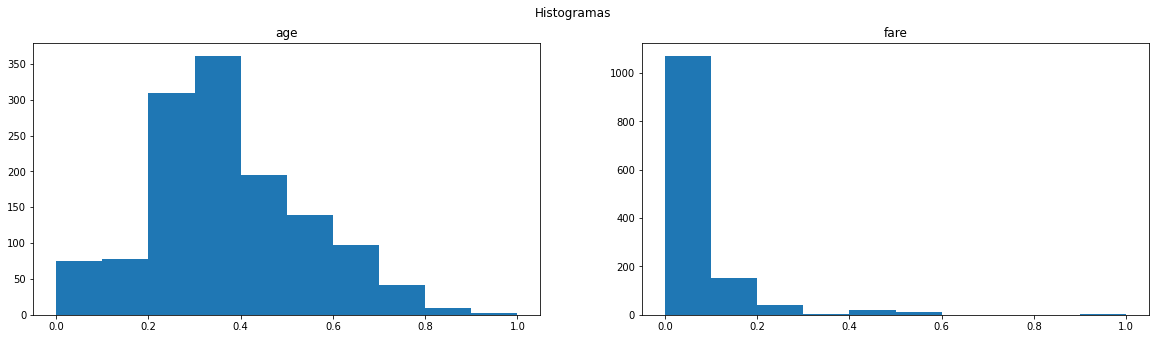

In [36]:
# Imputa los valores missing de las variables con valores missing
X["fare"] = X["fare"].fillna(X["fare"].mean())                                  #Imputacion de la variable "fare"

from sklearn.impute import KNNImputer                                           #Imputación de la variable "age" usando KNNimputer
from sklearn.preprocessing import MinMaxScaler                                  #Normalización usando MinMaxScaler
scaler = MinMaxScaler()
X_escalado = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
imputer = KNNImputer(n_neighbors=4,missing_values=np.nan)
X_imputado = pd.DataFrame(imputer.fit_transform(X_escalado),columns=X_escalado.columns)

# Comprueba que ya no existan registros con valores nulos
X_imputado.isna().sum()

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5))                              #Histogramas para variables imputadas
fig.suptitle('Histogramas')
ax1.hist(X_imputado["age"],bins=10)
ax2.hist(X_imputado["fare"],bins=10)
ax1.set_title("age")
ax2.set_title("fare")

In [37]:
# Revisa los rangos de las distintas variables independientes
imprimir = pd.DataFrame(columns=["Variable","Min","Max"])
for j in range(0,len(X_imputado.columns)):
  k = X_imputado.columns[j]
  imprimir.at[j, ['Variable',"Min","Max"]]=[k,X_imputado[k].min(),X_imputado[k].max()]
imprimir

,Variable,Min,Max
0,age,0.0,1.0
1,sibsp,0.0,1.0
2,parch,0.0,1.0
3,fare,0.0,1.0
4,embarked_Q,0.0,1.0
5,embarked_S,0.0,1.0
6,sex_male,0.0,1.0


In [38]:
# Normaliza los valores de las variables independientes

# Respuesta: Ya realicé la normalización al imputar los valores

In [39]:
# Revisa los rangos de las distintas variables independientes
imprimir = pd.DataFrame(columns=["Variable","Min","Max"])
for j in range(0,len(X_imputado.columns)):
  k = X_imputado.columns[j]
  imprimir.at[j, ['Variable',"Min","Max"]]=[k,X_imputado[k].min(),X_imputado[k].max()]
imprimir

,Variable,Min,Max
0,age,0.0,1.0
1,sibsp,0.0,1.0
2,parch,0.0,1.0
3,fare,0.0,1.0
4,embarked_Q,0.0,1.0
5,embarked_S,0.0,1.0
6,sex_male,0.0,1.0


In [40]:
# Utiliza la función de sklearn para partir los datos en set de entrenamiento y validación
# 70% train, 30% test, utiliza una semilla para poder replicar resultados (busca en la documentación de sklearn como hacer esto)
X_train, X_test, y_train, y_test = train_test_split(X_imputado, y, test_size=0.3, random_state=1)

# Define las Matrices de variables independientes con intercepto (agregar una columna con puros 1s)
y

array(['1', '1', '0', ..., '0', '0', '0'], dtype=object)

In [41]:
# Define todas las funciones que necesitas para llevar a cabo el proceso de gradiente descendente con una función de costo de error cuadrático medio
# Determina los parámetros W tal óptimos. Para ello encuentra los hyper parámetros óptimos para la tasa de aprendizaje gamma y el número máximo de iteraciones
# Recuerda agregar una columna de 1s a la matrix X, con ello estarás optimizando todos los parámetros, incluido el intercepto o w0


Ahora vamos a transformar los resultados del proceso anterior en probabilidades para el modelo de clasificación. Para ello debes expresar la variable target como una combinación lineal de los parámetros óptimos obtenidos con el proceso anterior y transformarlos utilizando la función sigmoide

$\sigma(t) = \displaystyle \frac{1}{1+exp(-t)}$

In [42]:
# Define la función sigmoide


In [43]:
# Determina y_pred
# Hint: Recuerda que en una regresión lineal, la variable target se puede escribir como combinación lineal de los parámetros óptimos y la matrix X (y = XW^T)
# Utiliza X_b (X con una fila de 1s para representar el intercepto)


# Transforma el resultado anterior utilizando la función sigmoide definida anteriomente


In [44]:
# Asignar una etiqueta positiva o negativa si la probabilidad sobrepasa un threshold de probabilidad determinado
# Prueba con threshold de probabilidad = 60%


**[Stretch: Por 5 puntos extras]** Determinar cuál es el valor óptimo para el threshold de probabilidad

In [45]:
# Ya sea con 60% como threshold de probabilidad u otro valor optimizado, evalúa el modelo creado
# Distribución de predicciones 


In [46]:
# Muestra la matriz de confusión


In [47]:
# Cuántos errores cometimos?


In [48]:
# Calcula la efectividad


In [49]:
# Calcula el recall y la precisión de la predicción


In [50]:
# Utiliza la función de sklearn llamada roc_curve para determinar la lista de tasa de falsos y verdaderos positivos


# Parte 2 - Entrena un modelo de clasificación de sentimientos. [70 puntos]
Esta parte de la tarea consiste en entrenar un modelo de clasificación de sentimientos. Lee las instrucciones con cuidado y justifica tus resultados.

## Descripción
En esta tarea vamos a ayudar a un científic@ de datos a predecir el sentimiento de reseñas que los usuarios de la aplicación móvil de la Institución Financiera para la que trabaja dan acerca de ella. Para ello, tiene un set de datos (**data_app_movil.csv**) con el siguiente layout:

**Layout Tabla de datos*:**
* at: Fecha en la que la reseña fue hecha
* content: Texto de la reseña
* repliedAt: Fecha en la que se respondió a la reseña hecha por el usuario
* replyContent: Texto de la respuesta a la reseña hecha por el usuario
* reviewCreatedVersion: Versión de la aplicación móvil que el usuario tenía al dar la reseña de la misma
* reviewId: ID del usuario que escribió la reseña de la aplicación móvil
* thumbsUpCount: Número de pulgares hacía arriba (votos de otros usuarios que apoyan una reseña)
* sentiment: Sentimiento de la reseña escrita por un usuario

**Objetivo:**
En esta tarea deberás ayudar al científic@ de datos a entrenar un modelo supervisado para clasificar los sentimientos de las reseñas de los usuarios de la aplicación móvil.

*Los datos con los que fue hecho este set son públicos

## Importa librerías importantes

In [51]:
# Import useful libraries
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
from scipy import stats
import re
import pandas as pd
import numpy as np
from numpy import zeros
from numpy import asarray
from numpy import array
import itertools
import collections
import csv

# Tunning plots
import matplotlib.lines as mlines
from matplotlib.ticker import MaxNLocator
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline
pd.set_option('display.max_columns', 100)
SEED = 15432

# scikit-learn
from sklearn.linear_model            import LinearRegression, LogisticRegression, Ridge, RidgeCV
from sklearn.svm                     import SVC
from sklearn.ensemble                import RandomForestClassifier
from sklearn.ensemble                import GradientBoostingClassifier
from sklearn.preprocessing           import LabelEncoder,OneHotEncoder
from sklearn.model_selection         import StratifiedKFold
from sklearn.model_selection         import validation_curve
from sklearn.model_selection         import train_test_split
from sklearn.metrics                 import confusion_matrix
from sklearn.metrics                 import accuracy_score
from sklearn.model_selection         import train_test_split
from sklearn.model_selection         import cross_val_predict
from sklearn.model_selection         import cross_val_score
from sklearn                         import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition           import TruncatedSVD
from sklearn.naive_bayes             import GaussianNB
from sklearn.metrics         import roc_curve, roc_auc_score

# Ignore some warnings 
import warnings
warnings.filterwarnings('ignore')

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils  import simple_preprocess
from gensim.models import CoherenceModel

# NLTK
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem     import WordNetLemmatizer 
from nltk.corpus   import stopwords

# Read/Write xlsx files
from openpyxl import workbook 
from openpyxl import load_workbook
import os

## Importa los datos
**Ojo:** importa solo las variables que necesites para la tarea (layout). Intenta nombrar al dataframe **data** 

In [52]:
data = pd.read_csv("data_app_movil.csv")
data.head(1)

,Unnamed: 0,at,content,repliedAt,replyContent,reviewCreatedVersion,reviewId,thumbsUpCount,sentiment
0,0,2019-11-10 13:21:40,Está muy bien la app lo único que haría falta ...,NaN,NaN,11.12.191105,gp:AOqpTOGfJ1RQk-t56JnOxTN9TmuzS2_tZtmdrRgXhNo...,1069,non-negative


## Exploración Básica de Datos [10 puntos]
En esta sección tienes que explorar los datos, haz un análisis exhaustivo para responder las siguientes preguntas:

* ¿Cuántos registros y columnas tiene el set de datos?
* ¿Qué porcentaje de valores nulos presenta cada variable? 
* ¿Hay reseñas duplicadas? ¿Cuáles son?
* ¿Cuál es la variable target?
* ¿Cuál es la distribución de la variable target?
* ¿Cuál es la reseña con más apoyo por parte de otros usuarios (thumbsUpCount)?
* ¿Qué porcentaje de reseñas son respondidas por la Institución financiera?
* ¿Cuál es el rango de fechas en las que fueron escritas las reseñas de este set de datos?
* ¿Qué otras cosas básicas crees que vale la pena analizar de este set de datos?

Numero de filas: 199998
Numero de columnas: 9

Porcentaje de valores nulos
Unnamed: 0               0.000000
at                       0.000000
content                  0.000000
repliedAt               60.604106
replyContent            60.604106
reviewCreatedVersion     9.451595
reviewId                 0.000000
thumbsUpCount            0.000000
sentiment                0.000000
dtype: float64 

Resenas duplicadas:
                                      Resena  Numero de repeticiones
0                                  Excelente                    7397
1                                  Muy buena                    3589
2                                  excelente                    3539
3                                      Buena                    3361
4                                   Exelente                    1680
...                                      ...                     ...
4001                  muy buena aplicación!!                       2
4002                     muy ú

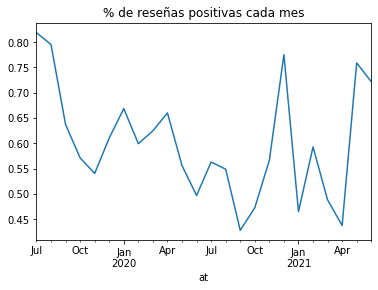

In [53]:
# Número de registros y columnas del dataset.
print("Numero de filas:",data.shape[0])
print("Numero de columnas:",data.shape[1])

# Porcentaje de valores nulos que presenta cada variable
print("\nPorcentaje de valores nulos")
print(data.isna().sum()*100/len(data),"\n")                                     #Las variables "repliedAt" y "replyContent" tiene más del 60% de valores missing

# ¿Hay reseñas duplicadas? ¿Cuáles son?                                         #Existen reseñas duplicada pero todas ellas corresponden a Id de usuarios distintos.
print("Resenas duplicadas:")
a = data.groupby("content")["Unnamed: 0"].count().sort_values(ascending=False)
a = a[a>1]
a = a.reset_index()
a.columns = ["Resena","Numero de repeticiones"]
print(a,"\n")

# ¿Cuál es la variable target?
print("Variable target: sentiment\n" )

# ¿Cuál es la distribución de la variable target?                               #La variable objetivo esta dividida en 63% sentimiento no-negativo y 36% sentimiento negativo
print("Distribución de la variable objetivo:")                                  #Por lo cual para este problema la variable esta balanceada
print(data["sentiment"].value_counts(1)*100,"\n")

# ¿Cuál es la reseña con más apoyo por parte de otros usuarios (thumbsUpCount)?
print("Resena con mas pulgares arriba:")
print(data[["content","reviewId","thumbsUpCount","sentiment"]].sort_values(by="thumbsUpCount",ascending=False).head(1),"\n")

# ¿Qué porcentaje de reseñas son respondidas por la Institución financiera?
print("Porcentaje de resenas con respuesta:")
print(100-100*data["repliedAt"].isna().sum()/len(data),"\n")

# ¿Cuál es el rango de fechas en las que fueron escritas las reseñas de este set de datos?
print("Rango de fechas:", data["at"].min()," al ", data["at"].max(),"\n")

# ¿Qué otras cosas básicas crees que vale la pena analizar de este set de datos?
# Conocer el % de reseñas positivas por mes 

data["at"] = pd.to_datetime(data["at"],format="%Y-%m-%d %H:%M:%S")
a = pd.merge(data,pd.get_dummies(data["sentiment"]),left_index=True,right_index=True).groupby("at")["negative","non-negative"].sum()
a = a.groupby(pd.Grouper(freq="M"))
a = a.sum()
a["% de reseñas positivas"] = a["non-negative"]/(a["non-negative"]+a["negative"])

import matplotlib.pyplot as plt
a["% de reseñas positivas"].plot(title="% de reseñas positivas cada mes")
print("Podemos observar que el procentaje de reseñas positivas registro una disminución importante en Septiembre del 2022 y Abril del 2021")

## Procesamiento de Texto [5 puntos]
Para que un modelo de predicción pueda recibir como input un corpus de texto, primero se tiene que limpiar, y luego convertr a una matriz numérica tal que conserve la semántica del texto. 
En esta sección haremos la limpieza de la variable de texto llamada 'content'. Existen varias formas de hacerlo, enlistamos las técnicas que usaremos:
* Eliminar caracteres especiales, signos de puntiación, números
* Eliminar acentos
* Convertir a minúsculas todas las palabras en el texto
* Eliminar stop words ¿Qué son las stop words? Investiga en internet y escribe un parráfo de ello
* Eliminar palabras que tengan menos de 3 caracteres

In [54]:
!pip install unidecode
import unidecode

     |████████████████████████████████| 235 kB 24.2 MB/s 


In [55]:
# Define funciones para limpiar texto
# Importa algunas librerías útiles para las tareas de limpieza de texto
import nltk
import spacy
from spacy.lang.es import Spanish
import re
import string
#from unidecode import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import itertools
import collections
import csv


# Si no has descargado el archivo de stop words en español, al ejecutar este pesado de código te saldrá un error. 
# Investiga en internet cómo descargar la lista de stopwords en español                                         
nlp = Spanish()
import nltk
nltk.download('stopwords')

# Stop words en español
stop_words = list(set(stopwords.words('spanish')))

# ¿Con el conocimiento que tienes de stop words, cuáles crees que nos falten de agregar? Yo te agrego unas, pero piensa en otras

# Respuesta:
# Las stop words son palabras usadas de manera comun en un texto, por ejemplo, "los", "las", "el","es","un".
# Las stop words son usadas en la minería de textos y el procesamiento de lenguaje natural, para eliminar palabras que son comunmente usadas y 
# y que contienen poca información. Por ejemplo, al realizar la búsqueda en Google, "Que es una stop word" lo deseable sería que el sistema
# de busqueda se enfoque en las palabras "stop" y "word" en vez de las palabras "que", "es" y "una".
# Existen listas de palabras que fácilmente podemos cargar y utilizar, algunas de ellas se han recopiliado
# de distintos trabajos en NLP y algunas otras son elaboradas por diferentes personas.
stop_words.append('aplicacion');stop_words.append('banco')
stop_words.append('a');
stop_words.append('actualmente');
stop_words.append('acuerdo');
stop_words.append('adelante');
stop_words.append('ademas');
stop_words.append('ademas');
stop_words.append('adrede');
stop_words.append('afirmo');
stop_words.append('agrego');
stop_words.append('ahi');
stop_words.append('ahora');
stop_words.append('ahi');
stop_words.append('al');
stop_words.append('algo');
stop_words.append('alguna');
stop_words.append('algunas');
stop_words.append('alguno');
stop_words.append('algunos');
stop_words.append('algun');
stop_words.append('alli');
stop_words.append('alli');
stop_words.append('alrededor');
stop_words.append('ambos');
stop_words.append('ampleamos');
stop_words.append('antano');
stop_words.append('antaño');
stop_words.append('ante');
stop_words.append('anterior');
stop_words.append('antes');
stop_words.append('aproximadamente');
stop_words.append('aquel');
stop_words.append('aquella');
stop_words.append('aquellas');
stop_words.append('aquello');
stop_words.append('aquellos');
stop_words.append('aqui');
stop_words.append('aquel');
stop_words.append('aquella');
stop_words.append('aquellas');
stop_words.append('aquellos');
stop_words.append('aqui');
stop_words.append('arriba');
stop_words.append('arribaabajo');
stop_words.append('asi');
stop_words.append('asi');
stop_words.append('atras');
stop_words.append('aun');
stop_words.append('aunque');
stop_words.append('ayer');
stop_words.append('aun');
stop_words.append('b');
stop_words.append('breve');
stop_words.append('c');
stop_words.append('cada');
stop_words.append('casi');
stop_words.append('cerca');
stop_words.append('cierta');
stop_words.append('ciertas');
stop_words.append('cierto');
stop_words.append('ciertos');
stop_words.append('cinco');
stop_words.append('claro');
stop_words.append('comento');
stop_words.append('como');
stop_words.append('con');
stop_words.append('conmigo');
stop_words.append('conocer');
stop_words.append('conseguimos');
stop_words.append('conseguir');
stop_words.append('considera');
stop_words.append('considero');
stop_words.append('consigo');
stop_words.append('consigue');
stop_words.append('consiguen');
stop_words.append('consigues');
stop_words.append('contigo');
stop_words.append('contra');
stop_words.append('cosas');
stop_words.append('creo');
stop_words.append('cual');
stop_words.append('cuales');
stop_words.append('cualquier');
stop_words.append('cuando');
stop_words.append('cuanta');
stop_words.append('cuantas');
stop_words.append('cuanto');
stop_words.append('cuantos');
stop_words.append('cuatro');
stop_words.append('cuenta');
stop_words.append('cual');
stop_words.append('cuales');
stop_words.append('cuando');
stop_words.append('cuanta');
stop_words.append('cuantas');
stop_words.append('cuanto');
stop_words.append('cuantos');
stop_words.append('como');
stop_words.append('d');
stop_words.append('da');
stop_words.append('dado');
stop_words.append('dan');
stop_words.append('dar');
stop_words.append('de');
stop_words.append('debajo');
stop_words.append('debe');
stop_words.append('deben');
stop_words.append('debido');
stop_words.append('decir');
stop_words.append('dejo');
stop_words.append('del');
stop_words.append('delante');
stop_words.append('demas');
stop_words.append('dentro');
stop_words.append('desde');
stop_words.append('despues');
stop_words.append('despues');
stop_words.append('detras');
stop_words.append('detras');
stop_words.append('dia');
stop_words.append('dias');
stop_words.append('dice');
stop_words.append('dicen');
stop_words.append('dicho');
stop_words.append('dieron');
stop_words.append('diferente');
stop_words.append('diferentes');
stop_words.append('dijeron');
stop_words.append('dijo');
stop_words.append('dio');
stop_words.append('donde');
stop_words.append('dos');
stop_words.append('durante');
stop_words.append('dia');
stop_words.append('dias');
stop_words.append('donde');
stop_words.append('e');
stop_words.append('ejemplo');
stop_words.append('el');
stop_words.append('ella');
stop_words.append('ellas');
stop_words.append('ello');
stop_words.append('ellos');
stop_words.append('embargo');
stop_words.append('emplean');
stop_words.append('emplear');
stop_words.append('empleas');
stop_words.append('empleo');
stop_words.append('en');
stop_words.append('encima');
stop_words.append('encuentra');
stop_words.append('enfrente');
stop_words.append('enseguida');
stop_words.append('entonces');
stop_words.append('entre');
stop_words.append('era');
stop_words.append('eramos');
stop_words.append('eran');
stop_words.append('eras');
stop_words.append('eres');
stop_words.append('es');
stop_words.append('esa');
stop_words.append('esas');
stop_words.append('ese');
stop_words.append('eso');
stop_words.append('esos');
stop_words.append('esta');
stop_words.append('estaba');
stop_words.append('estaban');
stop_words.append('estabas');
stop_words.append('estad');
stop_words.append('estada');
stop_words.append('estadas');
stop_words.append('estado');
stop_words.append('estados');
stop_words.append('estamos');
stop_words.append('estan');
stop_words.append('estando');
stop_words.append('estar');
stop_words.append('estaremos');
stop_words.append('estara');
stop_words.append('estaran');
stop_words.append('estaras');
stop_words.append('estare');
stop_words.append('estaria');
stop_words.append('estariamos');
stop_words.append('estarian');
stop_words.append('estas');
stop_words.append('este');
stop_words.append('estemos');
stop_words.append('esto');
stop_words.append('estos');
stop_words.append('estoy');
stop_words.append('estuve');
stop_words.append('estuviera');
stop_words.append('estuvieran');
stop_words.append('estuvieras');
stop_words.append('estuvieron');
stop_words.append('estuviese');
stop_words.append('estuviesen');
stop_words.append('estuvieses');
stop_words.append('estuvimos');
stop_words.append('estuviste');
stop_words.append('estuvieramos');
stop_words.append('estuviesemos');
stop_words.append('estuvo');
stop_words.append('esta');
stop_words.append('estabamos');
stop_words.append('estan');
stop_words.append('estas');
stop_words.append('este');
stop_words.append('esten');
stop_words.append('estes');
stop_words.append('ex');
stop_words.append('excepto');
stop_words.append('existe');
stop_words.append('existen');
stop_words.append('explico');
stop_words.append('expreso');
stop_words.append('f');
stop_words.append('fin');
stop_words.append('final');
stop_words.append('fue');
stop_words.append('fuera');
stop_words.append('fueran');
stop_words.append('fueras');
stop_words.append('fueron');
stop_words.append('fuese');
stop_words.append('fuesen');
stop_words.append('fueses');
stop_words.append('fui');
stop_words.append('fuimos');
stop_words.append('fuiste');
stop_words.append('fueramos');
stop_words.append('fuesemos');
stop_words.append('g');
stop_words.append('general');
stop_words.append('gran');
stop_words.append('grandes');
stop_words.append('gueno');
stop_words.append('h');
stop_words.append('ha');
stop_words.append('haber');
stop_words.append('habia');
stop_words.append('habida');
stop_words.append('habidas');
stop_words.append('habido');
stop_words.append('habidos');
stop_words.append('habiendo');
stop_words.append('habla');
stop_words.append('hablan');
stop_words.append('habremos');
stop_words.append('habra');
stop_words.append('habran');
stop_words.append('habras');
stop_words.append('habre');
stop_words.append('habreis');
stop_words.append('habria');
stop_words.append('habriamos');
stop_words.append('habrian');
stop_words.append('habrias');
stop_words.append('habia');
stop_words.append('habiamos');
stop_words.append('habian');
stop_words.append('habias');
stop_words.append('hace');
stop_words.append('hacemos');
stop_words.append('hacen');
stop_words.append('hacer');
stop_words.append('hacerlo');
stop_words.append('haces');
stop_words.append('hacia');
stop_words.append('haciendo');
stop_words.append('hago');
stop_words.append('han');
stop_words.append('has');
stop_words.append('hasta');
stop_words.append('hay');
stop_words.append('haya');
stop_words.append('hayamos');
stop_words.append('hayan');
stop_words.append('hayas');
stop_words.append('he');
stop_words.append('hecho');
stop_words.append('hemos');
stop_words.append('hicieron');
stop_words.append('hizo');
stop_words.append('horas');
stop_words.append('hoy');
stop_words.append('hube');
stop_words.append('hubieras');
stop_words.append('hubieron');
stop_words.append('hubiese');
stop_words.append('hubiesen');
stop_words.append('hubieses');
stop_words.append('hubimos');
stop_words.append('hubiste');
stop_words.append('hubieramos');
stop_words.append('hubiesemos');
stop_words.append('hubo');
stop_words.append('i');
stop_words.append('igual');
stop_words.append('indico');
stop_words.append('ir');
stop_words.append('j');
stop_words.append('junto');
stop_words.append('k');
stop_words.append('l');
stop_words.append('la');
stop_words.append('lado');
stop_words.append('largo');
stop_words.append('las');
stop_words.append('le');
stop_words.append('lejos');
stop_words.append('les');
stop_words.append('llego');
stop_words.append('lleva');
stop_words.append('llevar');
stop_words.append('lo');
stop_words.append('los');
stop_words.append('luego');
stop_words.append('lugar');
stop_words.append('m');
stop_words.append('mal');
stop_words.append('manera');
stop_words.append('manifesto');
stop_words.append('mas');
stop_words.append('mayor');
stop_words.append('me');
stop_words.append('mediante');
stop_words.append('medio');
stop_words.append('menciono');
stop_words.append('menudo');
stop_words.append('mi');
stop_words.append('mia');
stop_words.append('mias');
stop_words.append('mientras');
stop_words.append('mio');
stop_words.append('mios');
stop_words.append('mis');
stop_words.append('misma');
stop_words.append('mismas');
stop_words.append('mismo');
stop_words.append('mismos');
stop_words.append('modo');
stop_words.append('momento');
stop_words.append('muy');
stop_words.append('mas');
stop_words.append('mi');
stop_words.append('mia');
stop_words.append('mias');
stop_words.append('mio');
stop_words.append('mios');
stop_words.append('n');
stop_words.append('nada');
stop_words.append('nadie');
stop_words.append('ni');
stop_words.append('ninguna');
stop_words.append('ningunas');
stop_words.append('ninguno');
stop_words.append('ningunos');
stop_words.append('ningun');
stop_words.append('no');
stop_words.append('nos');
stop_words.append('nosotras');
stop_words.append('nosotros');
stop_words.append('nuestra');
stop_words.append('nuestras');
stop_words.append('nuestro');
stop_words.append('nuestros');
stop_words.append('nueva');
stop_words.append('nuevas');
stop_words.append('nuevo');
stop_words.append('nuevos');
stop_words.append('nunca');
stop_words.append('o');
stop_words.append('ocho');
stop_words.append('os');
stop_words.append('otra');
stop_words.append('otras');
stop_words.append('otro');
stop_words.append('otros');
stop_words.append('p');
stop_words.append('pais');
stop_words.append('para');
stop_words.append('parece');
stop_words.append('parte');
stop_words.append('partir');
stop_words.append('pasada');
stop_words.append('pasado');
stop_words.append('pais');
stop_words.append('peor');
stop_words.append('pero');
stop_words.append('pesar');
stop_words.append('podemos');
stop_words.append('poder');
stop_words.append('podria');
stop_words.append('podriamos');
stop_words.append('podrian');
stop_words.append('podrias');
stop_words.append('podra');
stop_words.append('podran');
stop_words.append('podria');
stop_words.append('podrian');
stop_words.append('poner');
stop_words.append('por');
stop_words.append('por que');
stop_words.append('porque');
stop_words.append('posible');
stop_words.append('primer');
stop_words.append('primera');
stop_words.append('primero');
stop_words.append('primeros');
stop_words.append('principalmente');
stop_words.append('pronto');
stop_words.append('propia');
stop_words.append('propias');
stop_words.append('propio');
stop_words.append('propios');
stop_words.append('proximo');
stop_words.append('proximo');
stop_words.append('proximos');
stop_words.append('pudo');
stop_words.append('pueda');
stop_words.append('puede');
stop_words.append('pueden');
stop_words.append('puedo');
stop_words.append('pues');
stop_words.append('q');
stop_words.append('qeu');
stop_words.append('que');
stop_words.append('quedo');
stop_words.append('queremos');
stop_words.append('quien');
stop_words.append('quienes');
stop_words.append('quiere');
stop_words.append('quien');
stop_words.append('quienes');
stop_words.append('que');
stop_words.append('r');
stop_words.append('raras');
stop_words.append('realizado');
stop_words.append('realizar');
stop_words.append('realizo');
stop_words.append('repente');
stop_words.append('respecto');
stop_words.append('s');
stop_words.append('sabe');
stop_words.append('sabemos');
stop_words.append('saben');
stop_words.append('saber');
stop_words.append('sabes');
stop_words.append('sal');
stop_words.append('salvo');
stop_words.append('se');
stop_words.append('sea');
stop_words.append('seamos');
stop_words.append('sean');
stop_words.append('seas');
stop_words.append('segun');
stop_words.append('segunda');
stop_words.append('segundo');
stop_words.append('segun');
stop_words.append('ser');
stop_words.append('sera');
stop_words.append('seremos');
stop_words.append('sera');
stop_words.append('seran');
stop_words.append('seras');
stop_words.append('sere');
stop_words.append('seria');
stop_words.append('seriamos');
stop_words.append('serian');
stop_words.append('serias');
stop_words.append('señalo');
stop_words.append('si');
stop_words.append('sido');
stop_words.append('siempre');
stop_words.append('siendo');
stop_words.append('siete');
stop_words.append('sigue');
stop_words.append('siguiente');
stop_words.append('sin');
stop_words.append('sino');
stop_words.append('sobre');
stop_words.append('somos');
stop_words.append('son');
stop_words.append('soy');
stop_words.append('soyos');
stop_words.append('su');
stop_words.append('supuesto');
stop_words.append('sus');
stop_words.append('suya');
stop_words.append('suyas');
stop_words.append('suyo');
stop_words.append('suyos');
stop_words.append('se');
stop_words.append('si');
stop_words.append('solo');
stop_words.append('t');
stop_words.append('tal');
stop_words.append('tambien');
stop_words.append('tambien');
stop_words.append('tampoco');
stop_words.append('tan');
stop_words.append('tanto');
stop_words.append('tarde');
stop_words.append('te');
stop_words.append('temprano');
stop_words.append('tendremos');
stop_words.append('tendra');
stop_words.append('tendran');
stop_words.append('tendras');
stop_words.append('tendre');
stop_words.append('tendria');
stop_words.append('tendriamos');
stop_words.append('tendrian');
stop_words.append('tendrias');
stop_words.append('tenemos');
stop_words.append('tener');
stop_words.append('tenga');
stop_words.append('tengamos');
stop_words.append('tengan');
stop_words.append('tengas');
stop_words.append('tengo');
stop_words.append('tenida');
stop_words.append('tenidas');
stop_words.append('tenido');
stop_words.append('tenidos');
stop_words.append('teniendo');
stop_words.append('tenia');
stop_words.append('teniamos');
stop_words.append('tenian');
stop_words.append('tenias');
stop_words.append('tercera');
stop_words.append('ti');
stop_words.append('tiempo');
stop_words.append('tiene');
stop_words.append('tienen');
stop_words.append('tienes');
stop_words.append('toda');
stop_words.append('todas');
stop_words.append('todavia');
stop_words.append('todavia');
stop_words.append('todo');
stop_words.append('todos');
stop_words.append('total');
stop_words.append('trabaja');
stop_words.append('trabajamos');
stop_words.append('trabajan');
stop_words.append('trabajar');
stop_words.append('trabajas');
stop_words.append('trabajo');
stop_words.append('tras');
stop_words.append('trata');
stop_words.append('traves');
stop_words.append('tres');
stop_words.append('tu');
stop_words.append('tus');
stop_words.append('tuve');
stop_words.append('tuviera');
stop_words.append('tuvieran');
stop_words.append('tuvieras');
stop_words.append('tuvieron');
stop_words.append('tuviese');
stop_words.append('tuviesen');
stop_words.append('tuvieses');
stop_words.append('tuvimos');
stop_words.append('tuviste');
stop_words.append('tuvieramos');
stop_words.append('tuviesemos');
stop_words.append('tuvo');
stop_words.append('tuya');
stop_words.append('tuyas');
stop_words.append('tuyo');
stop_words.append('tuyos');
stop_words.append('tu');
stop_words.append('ultimo');
stop_words.append('un');
stop_words.append('una');
stop_words.append('unas');
stop_words.append('uno');
stop_words.append('unos');
stop_words.append('usa');
stop_words.append('usamos');
stop_words.append('usan');
stop_words.append('usar');
stop_words.append('usas');
stop_words.append('uso');
stop_words.append('usted');
stop_words.append('ustedes');
stop_words.append('va');
stop_words.append('valor');
stop_words.append('vamos');
stop_words.append('van');
stop_words.append('varias');
stop_words.append('varios');
stop_words.append('vaya');
stop_words.append('veces');
stop_words.append('ver');
stop_words.append('verdad');
stop_words.append('verdadera');
stop_words.append('verdadero');
stop_words.append('vez');
stop_words.append('voy');
stop_words.append('ya');
stop_words.append('yo');
stop_words.append('el');
stop_words.append('eramos');
stop_words.append('esa');
stop_words.append('esas');
stop_words.append('ese');
stop_words.append('esos');
stop_words.append('esta');
stop_words.append('estas');
stop_words.append('este');
stop_words.append('estos');
stop_words.append('ultima');
stop_words.append('ultimas');
stop_words.append('ultimo');
stop_words.append('ultimos');
stop_words.append('bbva');


# Imprime la longitud de la lista de stopwords en español
print("The stop words list has a length of {} words".format(len(stop_words)))
# stop_words = list(map(remove_accents, stop_words))
# stop_words = list(map(str.lower,stop_words))
# stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
The stop words list has a length of 936 words


In [56]:
# unique = set(data.loc[0:10000,"content"].str.replace('[^a-zA-Z ]', '').str.lower().str.split(' ').sum())
# print(list(sorted(unique)))
# len(unique)

In [57]:
# Define funciones para limpiar texto
def remove_accents(a):
    """ Función para eliminar acentos
      
        Args:  
        a pandas series string
    """
    return unidecode.unidecode(a)

def clean_re(txt):
    """ Función para eliminar puntuación, convertir a minusculas, entre otras cosas
      
        Args:  
        txt pandas series string
    """
    # Convierte a minusculas
    txt = pd.Series(txt).str.lower()
    
    # Elimina caracteres especiales de tipo \t\n\r\f\v
    txt = pd.Series(txt).apply(lambda x: re.sub(r'[^\w\s]',' ',x))
    
    # Elimina palabras con menos de tres letras
    txt = txt.apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
    
    # Elimina números
    txt = pd.Series(txt).apply(lambda x: re.sub(r'\b\d+(?:\.\d+)?\s+', ' ', x))
    
    return txt

def remove_stopwords(txt):
    """ Función para eliminar stop words
      
        Args:  
        txt pandas series string
    """
    txt = pd.Series(txt).apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))
    return txt

In [58]:
# Aplica las funciones a la variable 'content'
# Esta parte del código tarda un poco
data['content_clean'] = data['content'].apply(clean_re)
data['content_clean'] = data['content_clean'].apply(remove_accents)
data['content_clean'] = data['content_clean'].apply(remove_stopwords)

**Revisa** la variable 'content_clean'
* ¿Cómo se diferencia de la variable 'content'?
* ¿De qué otras maneras podrías limpiar la variable 'content' para que el texto aporte el más valor posible al modelo de predicción?

In [59]:
# Muestra los primeros 5 registros del data set con las variables 'content' y 'content_clean'
print(data["content"].head(5),"\n\n")
print(data["content_clean"].head(5))

# Respuesta: 
# La diferencia se debe la variable "content_clean" presenta todas las tranformaciones que le aplicamos al texto, como eliminar acentos, 
# pasar todo a minusculas, asi como eliminar las stop words definidas anteriormente, ya que anadian poca información. 

0    Está muy bien la app lo único que haría falta ...
1    El cambio en la interfaz está genial! Me encan...
2    Excelente aplicación, muy fácil utilizar y ade...
3    Normalmente funciona muy bien, pero desde la ú...
4    Desde la actualización de la nueva imagen, fal...
Name: content, dtype: object 


0    bien unico haria falta podamos entrar lector h...
1    cambio interfaz genial encanto presentacion lu...
2    excelente facil utilizar rapidas transferencia...
3    normalmente funciona bien actualizacion falla ...
4    actualizacion imagen falla demasiado dificil a...
Name: content_clean, dtype: object


In [60]:
# Investiga en internet qué es tokenizar una oración y entiende que hace la siguiente línea de código

# Consiste en separar una frase, oración, o parrafo, o un documento entero de texto en unidades mpas pequeñas como palabras.
# En el caso de una oración, tokenizar signifca dividirla en palabras.

import nltk
nltk.download('punkt')

data['list_of_words'] = list(data['content_clean'].apply(lambda x : word_tokenize(x))) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [61]:
# Muestra los primeros 5 registros del data set con las variables 'content', 'content_clean', y 'list_of_words'
print(data["content"].head(5),"\n\n")
print(data["content_clean"].head(5),"\n\n")
print(data["list_of_words"].head(5))

0    Está muy bien la app lo único que haría falta ...
1    El cambio en la interfaz está genial! Me encan...
2    Excelente aplicación, muy fácil utilizar y ade...
3    Normalmente funciona muy bien, pero desde la ú...
4    Desde la actualización de la nueva imagen, fal...
Name: content, dtype: object 


0    bien unico haria falta podamos entrar lector h...
1    cambio interfaz genial encanto presentacion lu...
2    excelente facil utilizar rapidas transferencia...
3    normalmente funciona bien actualizacion falla ...
4    actualizacion imagen falla demasiado dificil a...
Name: content_clean, dtype: object 


0    [bien, unico, haria, falta, podamos, entrar, l...
1    [cambio, interfaz, genial, encanto, presentaci...
2    [excelente, facil, utilizar, rapidas, transfer...
3    [normalmente, funciona, bien, actualizacion, f...
4    [actualizacion, imagen, falla, demasiado, difi...
Name: list_of_words, dtype: object


## Exploración avanzada [10 puntos]
En esta parte analizamos de manera más avanzada la variable de texto. Investiga como dar respuesta  a las siguientes preguntas:
* Cuál es la distribución de la longitud de reseñas. Hint: Calcula la longitud de cada reseña en el set de datos. Saca estadísticos principales (media, mediana, desviación estándar, moda). Gráfica la distribución 
* ¿Cuál es el top 10 de palabras más usadas para las reseñas no negativas?
* ¿Cuál es el top 10 de palabras más usadas para las reseñas negativas?
* Investiga como hacer una nube de palabras y crea una para las palabras más usadas en todo el set de datos 

Media: 5.362218622186222
Mediana: 3.0
Desviacion Estandar: 5.941128969901116
Moda: 0    1
dtype: int64 



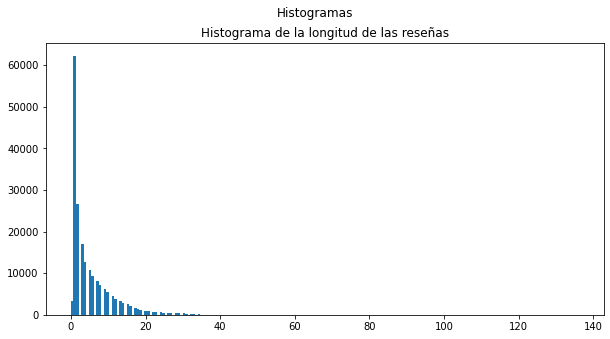



Top 10 de palabras mas usadas para resenas no-negativas [('excelente', 29565), ('buena', 27077), ('bien', 9779), ('facil', 9212), ('servicio', 6430), ('exelente', 5805), ('mejor', 5598), ('practica', 4773), ('util', 4022), ('gracias', 3730)] 

Top 10 de palabras mas usadas para resenas negativas [('deja', 15791), ('entrar', 14359), ('actualizacion', 11050), ('datos', 8083), ('facial', 6744), ('pesima', 6055), ('ingresar', 5829), ('permite', 5338), ('acceder', 5283), ('bien', 5022)] 

Top 10 de palabras mas usadas en todo el set de datos [('excelente', 30368), ('buena', 29536), ('deja', 19181), ('entrar', 17620), ('bien', 14801), ('actualizacion', 13491), ('facil', 10296), ('datos', 10168), ('servicio', 9934), ('mejor', 9560)] 



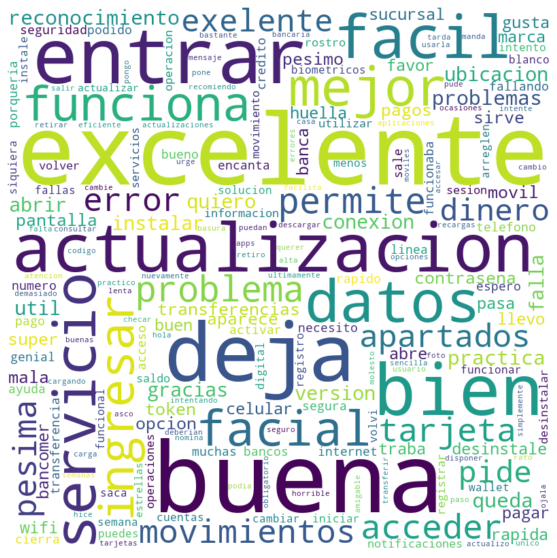

In [62]:
# Cuál es la distribución de la longitud de reseñas.

data["longitud_resenas"] = data["list_of_words"].apply(len)                     #Calculo de la longitud de las resenas

print("Media:",data["longitud_resenas"].mean())
print("Mediana:",data["longitud_resenas"].median())
print("Desviacion Estandar:",data["longitud_resenas"].std())
print("Moda:",data["longitud_resenas"].mode(),"\n")

fig, ax = plt.subplots(figsize=(10,5))                                          #Histogramas para variables numéricas
fig.suptitle('Histogramas')
ax.hist(data["longitud_resenas"],bins=200)
ax.set_title("Histograma de la longitud de las reseñas")
plt.show()
print("\n")

# ¿Cuál es el top 10 de palabras más usadas para las reseñas no negativas?
positivas = data[["sentiment","list_of_words"]][data["sentiment"]=="non-negative"].reset_index().copy()
from collections import Counter
counter = Counter(positivas["list_of_words"][0])
for i in positivas["list_of_words"][1::]: 
    counter.update(i)
print("Top 10 de palabras mas usadas para resenas no-negativas",counter.most_common(10),"\n")

# ¿Cuál es el top 10 de palabras más usadas para las reseñas negativas?
negativas = data[["sentiment","list_of_words"]][data["sentiment"]=="negative"].reset_index().copy()
from collections import Counter
counter = Counter(negativas["list_of_words"][0])
for i in negativas["list_of_words"][1::]: 
    counter.update(i)
print("Top 10 de palabras mas usadas para resenas negativas",counter.most_common(10),"\n")

# Investiga como hacer una nube de palabras y crea una para las palabras más usadas en todo el set de datos
# Respuesta: Una nube de palabras es una forma de representar visualmente las palabras que conforman un texto, donde el 
# tamaño de cada palabra es proporcional a su frecuencia.
from collections import Counter
counter = Counter(data["list_of_words"][0])
for i in data["list_of_words"][1::]: 
    counter.update(i)
print("Top 10 de palabras mas usadas en todo el set de datos",counter.most_common(10),"\n")
df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
df.columns = ["Palabra","Frecuencia"]
df = df.sort_values(by="Frecuencia",ascending=False)
df = dict(zip(df['Palabra'].tolist(), df['Frecuencia'].tolist()))
from wordcloud import WordCloud
wc = WordCloud(background_color='white',width=800, height=800, max_words=200).generate_from_frequencies(df)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Procesamiento de datos [5 puntos]
En esta parte tendrás que preparar los datos para poder entrenar modelos de aprendizaje de máquina. Para ello, tendrás que hacer lo siguiente:
* Separa el set de datos en set de variables independientes (X) y en variable target (y)
* Divide el set de datos en train (70%) y test (30%). Utiliza la semilla SEED=12345 para poder reproducir tus resultados

In [111]:
# Separa el set de datos en set de variables independientes (X) y en variable target (y)
y = np.array(data["sentiment"])
y[y=="negative"]="0"
y[y=="non-negative"]="1"
X = data[["content_clean"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

## Word Embeddings [5 puntos]
Convierte los datos de texto en una matriz numérica que los modelos de aprendizaje de máquina puedan utilizar. Para ello, te apoyaré con unas líneas de código pero te corresponde a ti lo siguiente:
* Investigar qué es un word embedding y por qué son importantes para entrenar un modelo de clasificación cuando se utilizan datos de texto
* Investigar acerca de los word embeddings TF-IDF y Bag of Words (BoW)

Yo te voy a enseñar cómo convertir los datos, pero te corresponde entender cómo funcionan y cómo manipularlos. 

In [64]:
# Investigar qué es un word embedding y por qué son importantes para entrenar un modelo de clasificación cuando se utilizan datos de texto
# Respuesta: 
# Word embedding es el nombre de un conjunto de modelos de lenguaje y técnicas de aprendizaje en procesamiento del lenguaje natural en donde las palabras o 
# frases del lenguaje natural son representadas como vectores de números reales.
# Las técnicas de Word Embeding son usadas para representar palabras de manera matemática. Algunos ejemplos de estas técnicas son 
# One Hot Encoding, TF-IDF, Word2Vec, FastText. Estas tecnicas son importantes ya que permiten procesar el texto para usarlo como input en las distitnas tecnicas
# de aprendizaje de maquinas y aprendizaje profundo.


# Investigar acerca de los word embeddings TF-IDF y Bag of Words (BoW)
# Respuesta:
# TF-IDF es una medida estadistica usada para determinar la significancia matematica de las palabras en un texto. Requiere un proceso de vectorización similar a 
# One Hot Encoding, con la diferencia de que el valor que se almacena es un valor TF-IDF en lugar de un 1 o 0 como en One Hot Encoding tradicional.
# Para obtenerlo se calcula el valor TF es decir la Frecuencia de cada termino. Y posteriormente el IDF (Frecuencia Inversa en el Documento).
# Finalmente el TF-IDF  se obtiene multiplicando TD y IDF
# Bag of Words: El modelo de bolsa de palabras es una forma de representar texto al usar datos textuales en algoritmos de aprendizaje de maquinas.
# Permite extraer caracteristicas del texto para poder modelar.

# Fuentes: 
# https://towardsdatascience.com/word-embedding-techniques-word2vec-and-tf-idf-explained-c5d02e34d08 
# https://machinelearningmastery.com/gentle-introduction-bag-words-model/


In [105]:
# Define función útil
def text_transformer(X_train, X_test, vectorizer):
    """ Función para crear word embeddings (TF-IDF y BoW)
      
        Args:  
        X_train pandas dataframe
        X_test  pandas dataframe
        varToVector string que contiene nombre de variable de texto
        vectorizer objeto para crear un word embedding de tipo TF-IDF y BoW
    """
    # Define método para convertir de texto a matrix numérica
    vectorizer_ = vectorizer
    vectorizer_.fit(X_train)

    X_train = vectorizer_.transform(X_train)
    X_test = vectorizer_.transform(X_test)
    return X_train, X_test

**TF-IDF**

Investiga qué parámetros puede tomar e intenta optimizarlos. X_train_TFID y X_test_TFID serán los sets de datos que tendrás que utilizar para entrenar modelos en la sección siguiente

In [109]:
# Crea un word embedding de tipo TF-IDF con el objeto de Sklearn llamado TfidfVectorizer
# TfidfVectorizer(Por optimizar)
X_train_TFID, X_test_TFID = text_transformer(X_train["content_clean"], X_test["content_clean"], TfidfVectorizer(min_df=300))  #Despues de multiples pruebas consideré el parametro min_df=300 de tal suerte que los modelos alcanzaban una solución en un tiempo razonable.

# Convierte el resultado anterior en una matriz poco densa que pueda ser usada para entrenar un modelo
X_train_TFID = pd.DataFrame(X_train_TFID.toarray())
X_test_TFID = pd.DataFrame(X_test_TFID.toarray()) 

X_train_TFID.shape

(139998, 376)

**Bag of Words (BoW)**

Investiga qué parámetros puede tomar e intenta optimizarlos. X_train_BoW y X_test_BoW serán los sets de datos que tendrás que utilizar para entrenar modelos en la sección siguiente

**[Stretch: 5 puntos extras] Word embeddings más complejos**

Investiga técnicas más complejas para crear word embeddings y utilizalas en la sección de entrenamiento de modelos. ¿Crees que ayuden a mejorar el performance de los mismos?

## Entrena modelos de aprendizaje de máquina [25 puntos]
Entrena al menos tres tipos de modelos de clasificación. Todo modelo extra podrá ser considerado para puntos extras. Tienes la libertad de entrenar los modelos de la manera que desees, entre mejor sea la metodología de entrenamiento y evaluación de resultados, más puntos obtendrás. 

In [107]:
# MODELO 1: REGRESION LOGISTICA
modelo_reg_log = LogisticRegression(random_state=0, solver='lbfgs')
modelo_reg_log.fit(X_train_TFID, y_train)
print(modelo_reg_log.score(X_test_TFID,y_test))
roc_auc_score(modelo_reg_log.predict(X_test_TFID), y_test)

0.88965


0.8785324966085271

In [98]:
# MODELO 2: NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
modelo_nb = GaussianNB()
modelo_nb.fit(X_train_TFID, y_train)
print(modelo_nb.score(X_test_TFID,y_test))
print(roc_auc_score(modelo_nb.predict(X_test_TFID), y_test))

0.8611
0.8474120191969529


In [99]:
# MODELO 3: DECISION TREE
from sklearn.tree import DecisionTreeClassifier
modelo_tree = DecisionTreeClassifier(max_depth=10)
modelo_tree.fit(X_train_TFID, y_train)
print(modelo_tree.score(X_test_TFID,y_test))
print(roc_auc_score(modelo_tree.predict(X_test_TFID), y_test))

0.8067666666666666
0.8192322766450579


**[Stretch: 10 puntos extras]** Para todos los modelos que entrenes, determinar cuál es el valor óptimo para el threshold de probabilidad

## Selecciona el mejor modelo [10 puntos]
En esta parte debes seleccionar el mejor modelo, ya sea usando bootstrap o de la manera que creas adeacuada. Justifica bien tus decisiones

In [100]:
X_complete_TFID = X_train_TFID.append(X_test_TFID,ignore_index=True).copy()
y_complete = np.append(y_test,y_train).copy()

In [114]:
# MODELO 1 USANDO BOOTSTRAP
ROC_AUC_1 =[]
muestras=10

for i in range(muestras):

  from sklearn.model_selection import train_test_split
  y = np.array(data["sentiment"])
  y[y=="negative"]="0"
  y[y=="non-negative"]="1"
  X = data[["content_clean"]]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1+i) #Al tomar cada muestra variar el random state

  # Crea un word embedding de tipo TF-IDF con el objeto de Sklearn llamado TfidfVectorizer
  # TfidfVectorizer(Por optimizar)
  X_train_TFID, X_test_TFID = text_transformer(X_train["content_clean"], X_test["content_clean"], TfidfVectorizer(min_df=300))  #Despues de multiples pruebas consideré el parametro min_df=300 de tal suerte que los modelos alcanzaban una solución en un tiempo razonable.
  # Convierte el resultado anterior en una matriz poco densa que pueda ser usada para entrenar un modelo
  X_train_TFID = pd.DataFrame(X_train_TFID.toarray())
  X_test_TFID = pd.DataFrame(X_test_TFID.toarray()) 


  # MODELO 1: REGRESION LOGISTICA
  modelo_reg_log = LogisticRegression(random_state=0, solver='lbfgs')
  modelo_reg_log.fit(X_train_TFID, y_train)
  #print(modelo_reg_log.score(X_test_TFID,y_test))
  #roc_auc_score(modelo_reg_log.predict(X_test_TFID), y_test)

  ROC_AUC_1.append(roc_auc_score(modelo_reg_log.predict(X_test_TFID), y_test))
   
# Final accuracy
print('Valor Proemdio de ROC_AUC',np.mean(ROC_AUC_1)) 

Valor Proemdio de ROC_AUC 0.8769514300940203


In [117]:
# MODELO 2 USANDO BOOTSTRAP
ROC_AUC_2 =[]
muestras=10

for i in range(muestras):

  from sklearn.model_selection import train_test_split
  y = np.array(data["sentiment"])
  y[y=="negative"]="0"
  y[y=="non-negative"]="1"
  X = data[["content_clean"]]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1+i) #Al tomar cada muestra variar el random state

  # Crea un word embedding de tipo TF-IDF con el objeto de Sklearn llamado TfidfVectorizer
  # TfidfVectorizer(Por optimizar)
  X_train_TFID, X_test_TFID = text_transformer(X_train["content_clean"], X_test["content_clean"], TfidfVectorizer(min_df=300))  #Despues de multiples pruebas consideré el parametro min_df=300 de tal suerte que los modelos alcanzaban una solución en un tiempo razonable.
  # Convierte el resultado anterior en una matriz poco densa que pueda ser usada para entrenar un modelo
  X_train_TFID = pd.DataFrame(X_train_TFID.toarray())
  X_test_TFID = pd.DataFrame(X_test_TFID.toarray()) 

  # MODELO 2: NAIVE BAYES
  from sklearn.naive_bayes import GaussianNB
  modelo_nb = GaussianNB()
  modelo_nb.fit(X_train_TFID, y_train)
  #print(modelo_nb.score(X_test_TFID,y_test))
  #print(roc_auc_score(modelo_nb.predict(X_test_TFID), y_test))

  ROC_AUC_2.append(roc_auc_score(modelo_nb.predict(X_test_TFID), y_test))
   
# Final accuracy
print('Valor Proemdio de ROC_AUC',np.mean(ROC_AUC_2)) 

Valor Proemdio de ROC_AUC 0.8489743226561168


In [119]:
# MODELO 3 USANDO BOOTSTRAP
ROC_AUC_3 =[]
muestras=10

for i in range(muestras):

  from sklearn.model_selection import train_test_split
  y = np.array(data["sentiment"])
  y[y=="negative"]="0"
  y[y=="non-negative"]="1"
  X = data[["content_clean"]]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1+i) #Al tomar cada muestra variar el random state

  # Crea un word embedding de tipo TF-IDF con el objeto de Sklearn llamado TfidfVectorizer
  # TfidfVectorizer(Por optimizar)
  X_train_TFID, X_test_TFID = text_transformer(X_train["content_clean"], X_test["content_clean"], TfidfVectorizer(min_df=300))  #Despues de multiples pruebas consideré el parametro min_df=300 de tal suerte que los modelos alcanzaban una solución en un tiempo razonable.
  # Convierte el resultado anterior en una matriz poco densa que pueda ser usada para entrenar un modelo
  X_train_TFID = pd.DataFrame(X_train_TFID.toarray())
  X_test_TFID = pd.DataFrame(X_test_TFID.toarray()) 

  # MODELO 3: DECISION TREE
  from sklearn.tree import DecisionTreeClassifier
  modelo_tree = DecisionTreeClassifier(max_depth=10)
  modelo_tree.fit(X_train_TFID, y_train)
  #print(modelo_tree.score(X_test_TFID,y_test))
  #print(roc_auc_score(modelo_tree.predict(X_test_TFID), y_test))

  ROC_AUC_3.append(roc_auc_score(modelo_tree.predict(X_test_TFID), y_test))
   
# Final accuracy
print('Valor Proemdio de ROC_AUC',np.mean(ROC_AUC_3)) 

Valor Proemdio de ROC_AUC 0.818379233342632


In [ ]:
# Desición tomada: Luego de realizar el proceso de muestreo con reemplazo, para 10 muestras, decidí elegir el modelo 1 regresion logistica,
# ya que es el que tuvo mejor desempeño en el conjunto de prueba. Al tener un ROC_AUC promedio del 0.87 considero que es una
# buena metrica. TAmbien considero que este modelo se puede mejorar haciendo una limpieza más exhaustiva de las palabras en las reseñas, toda vez que 
# existen algunas que constan unicamente de emoticons y eso podria mejorar el desempeño de este modelo.
# Por otra parte, podriamos intentar con otros algoritmos de clasificacion como SVM o Random Forest.